# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

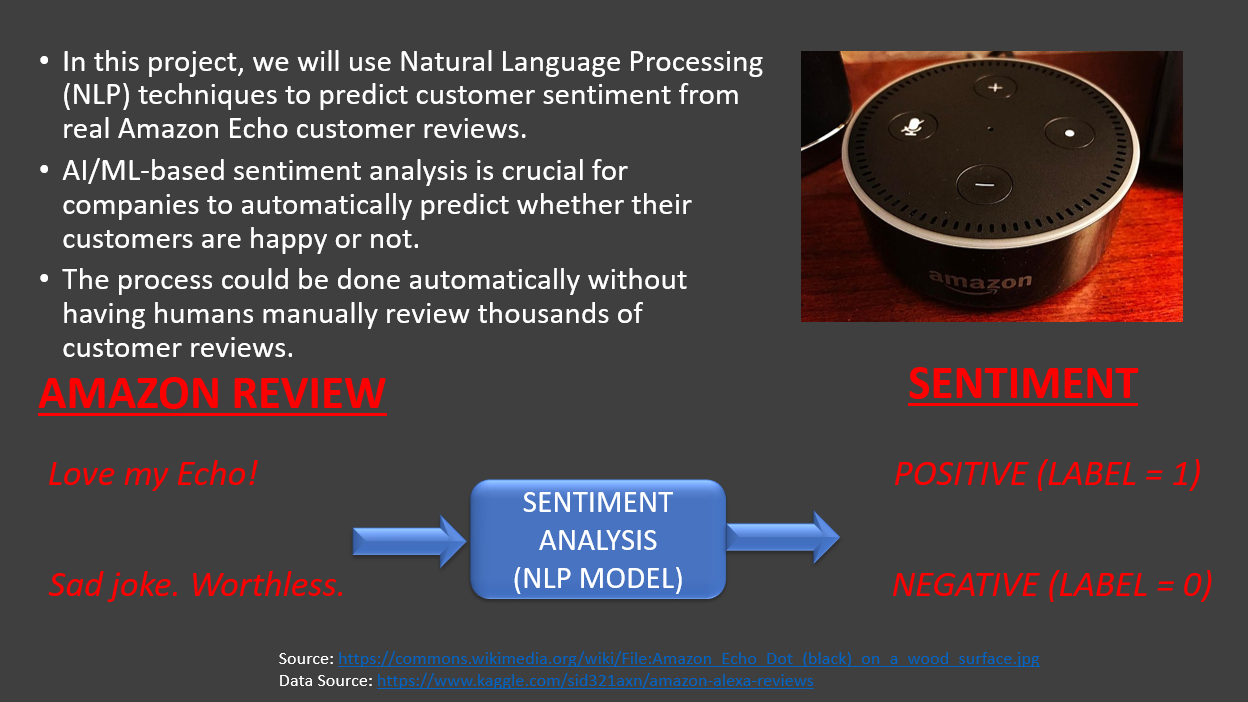

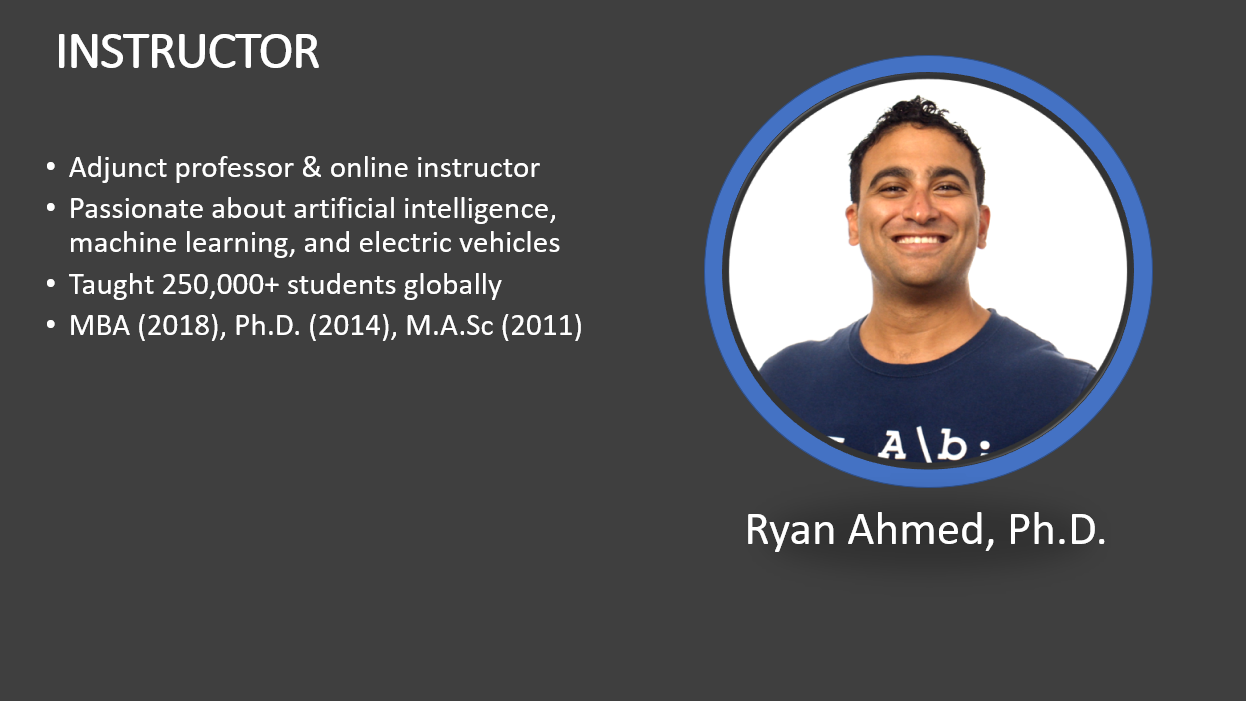

data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

In [ ]:
# View the DataFrame Information
reviews_df.info()

In [ ]:
# View DataFrame Statistical Summary
reviews_df.describe()

**MINI CHALLENGE #1:** 
- **Drop the 'date' column from the DataFrame** 
- **Ensure that the column has been succesfully dropped** 

# TASK #3: PERFORM DATA VISUALIZATION

In [ ]:
 sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False)

In [ ]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating']) 

**MINI CHALLENGE #2:** 
- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

# TASK #4: PERFORM DATA EXPLORATION

In [ ]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [ ]:
reviews_df

In [ ]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist') 

In [ ]:
# Apply the describe method to get statistical summary
reviews_df.describe()

In [ ]:
# Let's see the longest message 
reviews_df[reviews_df['length'] == 2851.000000]['verified_reviews'].iloc[0]

**MINI CHALLENGE #3:**
- **View the message with the average length**

# TASK #5: PLOT THE WORDCLOUD

In [ ]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]

In [ ]:
positive

In [ ]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]

In [ ]:
negative

In [ ]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

In [ ]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [ ]:
sentences_as_one_string

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**MINI CHALLENGE #4:** 
- **Plot the wordcloud of the "negative" dataframe** 
- **What do you notice? Does the data make sense?**

# TASK #6: TEXT DATA CLEANING 101

In [ ]:
import string
string.punctuation


In [ ]:
Test = '$I Love Coursera &Rhyme Guided Projects...!!!!'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

In [ ]:
import nltk # Natural Language tool kit 


In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

In [ ]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'

In [ ]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean

**MINI CHALLENGE #5:** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'

# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

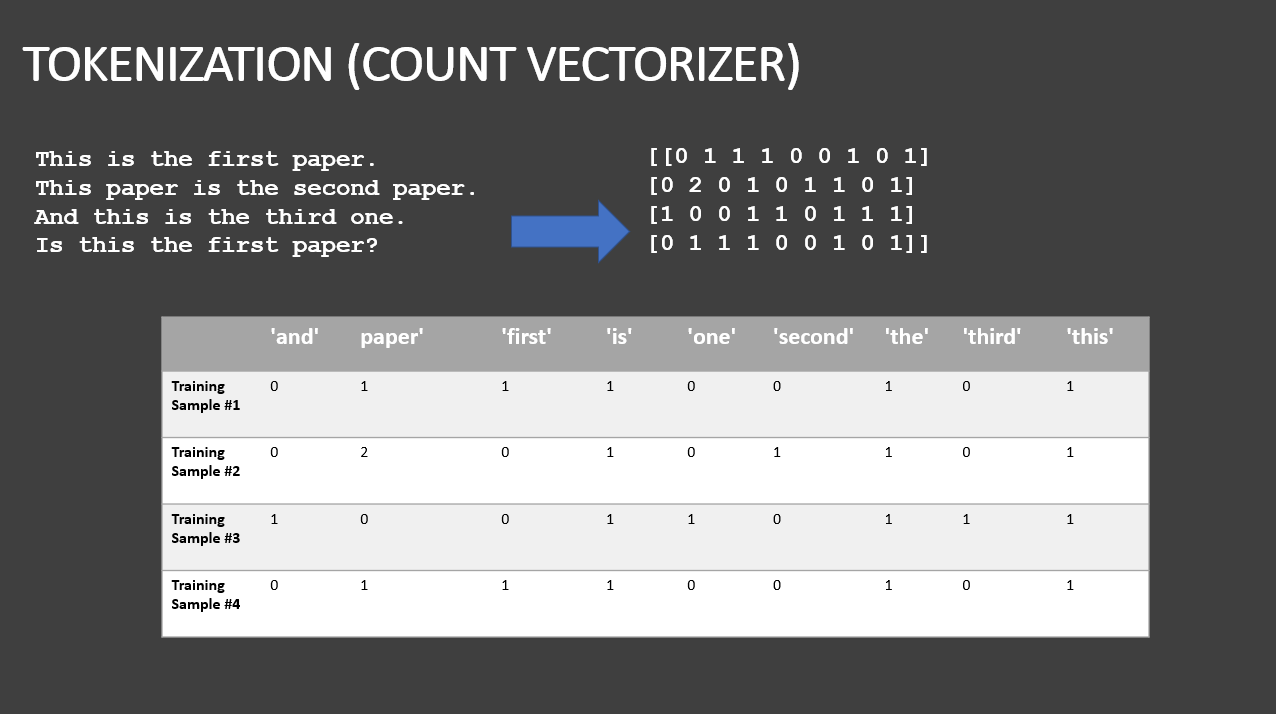

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [ ]:
print(vectorizer.get_feature_names())


In [ ]:
print(X.toarray())  

**MINI CHALLENGE #6:**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [ ]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

In [ ]:
# show the cleaned up version
print(reviews_df_clean[5])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(reviews_countvectorizer.toarray())  

In [ ]:
reviews_countvectorizer.shape

In [ ]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
X = reviews

In [ ]:
X

In [ ]:
y = reviews_df['feedback']
y

**MINI CHALLENGE #7:**
- **What is the shape of X and Y**

# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

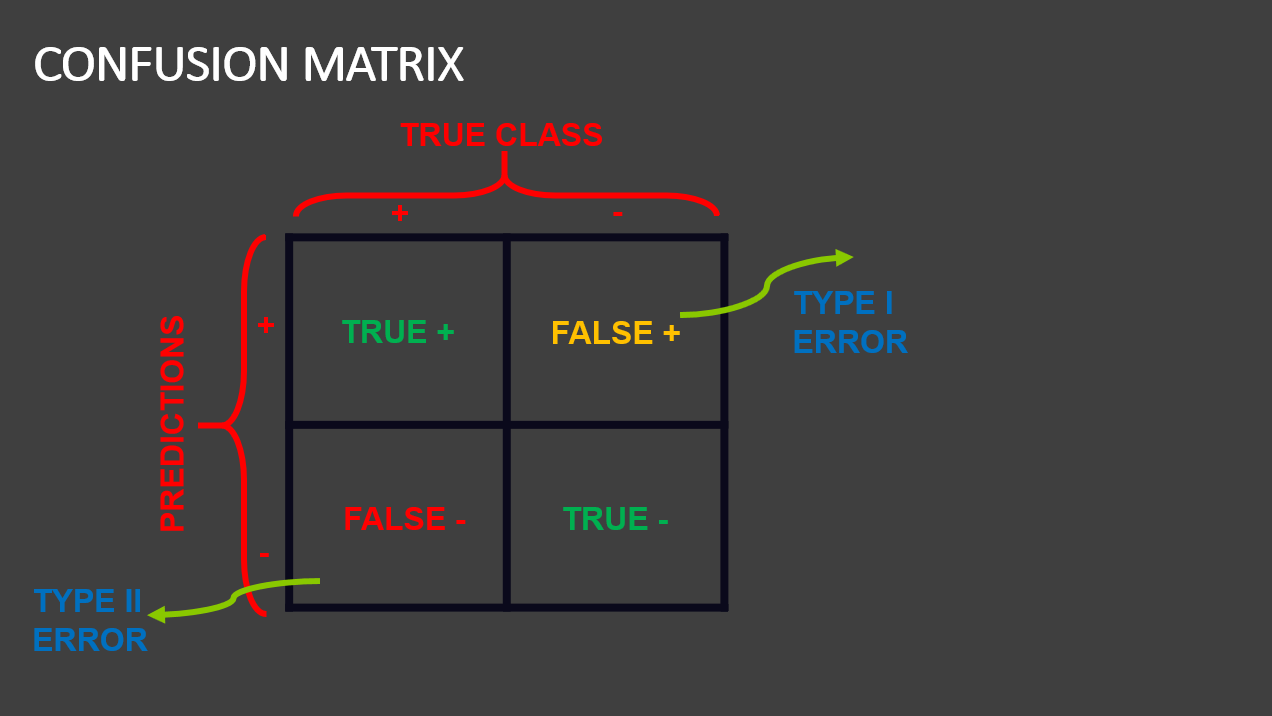

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

**MINI CHALLENGE #8:**
- **Train a logistic Regression classifier and assess its performance**

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

# MINI CHALLENGE SOLUTIONS

**MINI CHALLENGE #1 SOLUTION:** 
- **Drop the 'date' column from the DataFrame** 
- **Ensure that the column has been succesfully dropped** 

In [ ]:
# Drop the 'id' column
reviews_df = reviews_df.drop(['date'], axis = 1)

In [ ]:
reviews_df

**MINI CHALLENGE #2 SOLUTION:** 
- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

In [ ]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

**MINI CHALLENGE #3 SOLUTION:**
- **View the message with the average length**

In [ ]:
# Let's see the message with mean length 
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

**MINI CHALLENGE #4 SOLUTION:** 
- **Plot the wordcloud of the "negative" dataframe** 
- **What do you notice? Does the data make sense?**

In [ ]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**MINI CHALLENGE #5 SOLUTION:** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'
challege = [ char for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 
challenge

**MINI CHALLENGE #6 SOLUTION:**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())



**MINI CHALLENGE #7 SOLUTION:**
- **What is the shape of X and Y**

In [ ]:
X.shape

In [ ]:
y.shape

**MINI CHALLENGE #8 SOLUTION:**
- **Train a logistic Regression classifier and assess its performance**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Excellent Job!